In [134]:
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(tibble)
library(dplyr)
library(vegan); packageVersion("vegan")
library(scales)
library(repr)
library(viridis)
library(pheatmap)

[1] ‘3.2.1’

[1] ‘2.5.6’

In [133]:
#install.packages('pheatmap')


The downloaded binary packages are in
	/var/folders/c1/v3773qy11fg7h_518pj2r8lh0000gn/T//RtmpjHmPin/downloaded_packages


# MASH distances with reads

In [95]:
dist <- read.table('~/data/awtp2_metagenomics/awtp2_mash_dist.txt', sep='\t',
                   col.names = c('query', 'ref', 'distance', 'pval', 'matching_hashes'))

dist$distance <- as.numeric(dist$distance)

metadata <- read.table('~/data/awtp2_metagenomics/metagenomics_sample_table.tsv', sep='\t', header = TRUE)
# get a lookup of sample_id to sample_code:

id2code <- metadata[,c('sample_id', 'sample_code_partial')]

head(dist)
head(id2code)

query,ref,distance,pval,matching_hashes
<fct>,<fct>,<dbl>,<dbl>,<fct>
KNLK_11,KNLK_11,0.0000000,0.00000e+00,10000/10000
KNLK_13,KNLK_11,0.1912090,8.01352e-143,91/10000
KNLK_16,KNLK_11,0.1447690,0.00000e+00,245/10000
KNLK_23,KNLK_11,0.1938770,9.28982e-137,86/10000
KNLK_28,KNLK_11,0.1528430,0.00000e+00,206/10000
KNLK_32,KNLK_11,0.0371254,0.00000e+00,2975/10000


sample_id,sample_code_partial
<fct>,<fct>
KNLK_1,AWTP_2_RO2_biofilm_control_1
KNLK_10,DWDS_F_282B_bulk_1
KNLK_11,AWTP_2_BAC_bulk_5
KNLK_12,SDS_F_3_bulk_3
KNLK_13,AWTP_2_RO2_biofilm_sep_2
KNLK_14,DWDS_F_utility_bulk_9


In [96]:
# get sample names for plotting
df <- merge(dist, id2code, by.x='query', by.y='sample_id')
df <- merge(df, id2code, by.x='ref', by.y='sample_id')
df <- df[order(df$sample_code_partial.x, df$sample_code_partial.y),] # sort df

## Basic heatmap

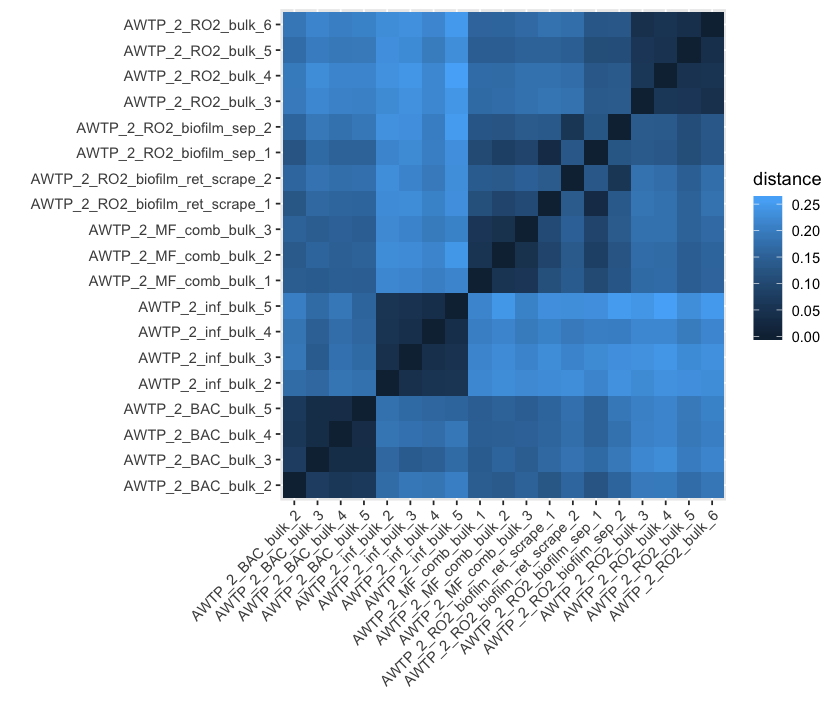

In [146]:
options(repr.plot.width = 7, repr.plot.height = 6)

ggplot(df, aes(x=sample_code_partial.x, y=sample_code_partial.y))+
    geom_tile(aes(fill=distance))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))+
    xlab('') + 
    ylab('')
ggsave('~/data/awtp2_metagenomics/mash_dist_heatmap.pdf', device="pdf", width=7, height=5.5)

## Clustered heatmap

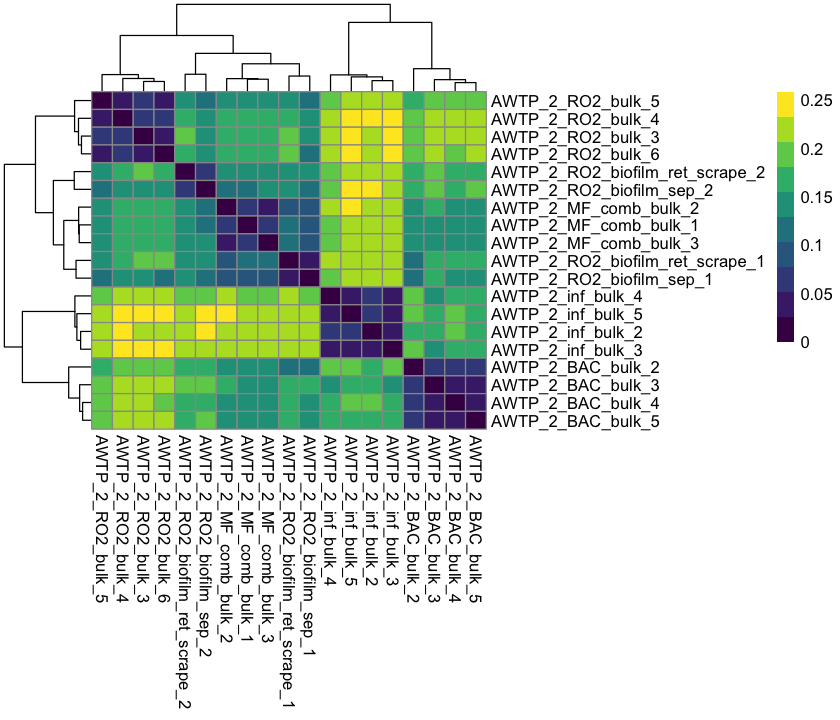

In [144]:
#subset selected columns
df2 <- df[c('sample_code_partial.x', 'sample_code_partial.y', 'distance')]
#reformat table to wide
df_wide <- df2 %>% spread(sample_code_partial.y, distance) %>% column_to_rownames('sample_code_partial.x')
#heatplus requires a matrix not a dataframe
m <- as.matrix(df_wide)
options(repr.plot.width = 7, repr.plot.height = 6)
pheatmap(m, color=viridis(10))

In [44]:
metadata2 <- read.table('~/data/awtp2_metagenomics/metagenomics_sample_table_rdcts.tsv', sep='\t', header = TRUE)
awtp2 <- metadata2[metadata2$project_type=='DPWF',]
awtp2

,sample_id,read_names,readcount,sample_16S,order,band_in_gel_amplicons,sample_code_partial,Sequal_prep_elute_pooled,Duplicate,need_optimization.,⋯,sample_or_control,location_code,sample_type,sampler_name,Ext_batch,Extraction_Date,Ext_num_unique,Microconcentrated.,DNA_Ext_conc_ngperuL,kit
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<lgl>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,KNLK_9,KNLK_9_S65,98191909,KNLK_SD147,NA,+,AWTP_2_BAC_bulk_2,N,FALSE,N,⋯,sample,BAC,DEUF,Scott_Miller,2,6/16/2018,13,N,17.500,PowerSoil Pro
2,KNLK_32,KNLK_32_S75,79258254,KNLK_SD023,75,+,AWTP_2_BAC_bulk_3,N,FALSE,N,⋯,sample,BAC,DEUF,Scott_Miller,Test_March11,3/11/2018,W5,supernatant,27.000,NA
3,KNLK_76,KNLK_76_S79,100871566,KNLK_SD160,NA,+,AWTP_2_BAC_bulk_4,N,FALSE,N,⋯,sample,BAC,DEUF,Scott_Miller,2,6/16/2018,14,N,85.600,PowerSoil Pro
4,KNLK_11,KNLK_11_S81,96482441,KNLK_SD028,81,+,AWTP_2_BAC_bulk_5,N,FALSE,N,⋯,sample,BAC,DEUF,Scott_Miller,2,6/16/2018,15,N,169.000,PowerSoil Pro
8,KNLK_77,KNLK_77_S8,98627622,KNLK_SD161,NA,+,AWTP_2_inf_bulk_2,N,FALSE,N,⋯,sample,WW_3ary,DEUF,Scott_Miller,1,6/15/2018,2,N,158.000,PowerSoil Pro
9,KNLK_66,KNLK_66_S86,95653219,KNLK_SD033,86,+,AWTP_2_inf_bulk_3,N,FALSE,N,⋯,sample,WW_3ary,DEUF,Scott_Miller,1,6/15/2018,3,N,680.000,PowerSoil Pro
10,KNLK_33,KNLK_33_S83,91849963,KNLK_SD030,83,+,AWTP_2_inf_bulk_4,N,FALSE,N,⋯,sample,WW_3ary,DEUF,Scott_Miller,1,6/15/2018,4,N,518.000,PowerSoil Pro
11,KNLK_44,KNLK_44_S84,52709971,KNLK_SD031,84,+,AWTP_2_inf_bulk_5,N,FALSE,N,⋯,sample,WW_3ary,DEUF,Scott_Miller,1,6/15/2018,5,N,542.000,PowerSoil Pro
12,KNLK_16,KNLK_16_S34,23986762,KNLK_SD132,NA,+,AWTP_2_MF_comb_bulk_1,N,FALSE,N,⋯,sample,MF_combined,DEUF,Scott_Miller,18,9/8/2018,171,Y,1.070,PowerSoil Pro


# Megahit assembly stats

In [91]:
assem_stats <- read.table('~/data/awtp2_metagenomics/assembly_stats.megahit.txt')[c(1,4,7,13,16,19)]
colnames(assem_stats) <- c('name', 'contigs', 'total_bp', 'max_contig', 'avg_contig', 'n50')
assem_stats <- separate(assem_stats, name, c('sample_id', 'timestamp'), sep='megahit', remove=TRUE)
#assem_stats <- subset(assem_stats, select = -c(timestamp))
assem_stats <- merge(assem_stats, metadata2, by='sample_id')
assem_stats <- subset(assem_stats, select = c(sample_id, contigs, total_bp, max_contig, avg_contig, n50, readcount, sample_code_partial, location_code))
assem_stats <- assem_stats[order(assem_stats$sample_code_partial),]
assem_stats$readcount_M <- round((assem_stats$readcount / 1e6),1)
assem_stats$total_Mbp <- round((assem_stats$total_bp / 1e6),1)

assem_stats

,sample_id,contigs,total_bp,max_contig,avg_contig,n50,readcount,sample_code_partial,location_code,readcount_M,total_Mbp
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>
19,KNLK_9,1307542,909879350,289497,695,730,98191909,AWTP_2_BAC_bulk_2,BAC,98.2,909.9
6,KNLK_32,956973,756965505,466611,790,943,79258254,AWTP_2_BAC_bulk_3,BAC,79.3,757.0
16,KNLK_76,1478462,1510953415,1389257,1021,1473,100871566,AWTP_2_BAC_bulk_4,BAC,100.9,1511.0
1,KNLK_11,1064197,856604057,416464,804,987,96482441,AWTP_2_BAC_bulk_5,BAC,96.5,856.6
17,KNLK_77,308503,290957958,342548,943,1451,98627622,AWTP_2_inf_bulk_2,WW_3ary,98.6,291.0
15,KNLK_66,333242,331281016,546731,994,1629,95653219,AWTP_2_inf_bulk_3,WW_3ary,95.7,331.3
7,KNLK_33,291560,287895517,308109,987,1633,91849963,AWTP_2_inf_bulk_4,WW_3ary,91.8,287.9
10,KNLK_44,237785,235852604,579857,991,1518,52709971,AWTP_2_inf_bulk_5,WW_3ary,52.7,235.9
3,KNLK_16,223492,207964750,822776,930,1182,23986762,AWTP_2_MF_comb_bulk_1,MF_combined,24.0,208.0


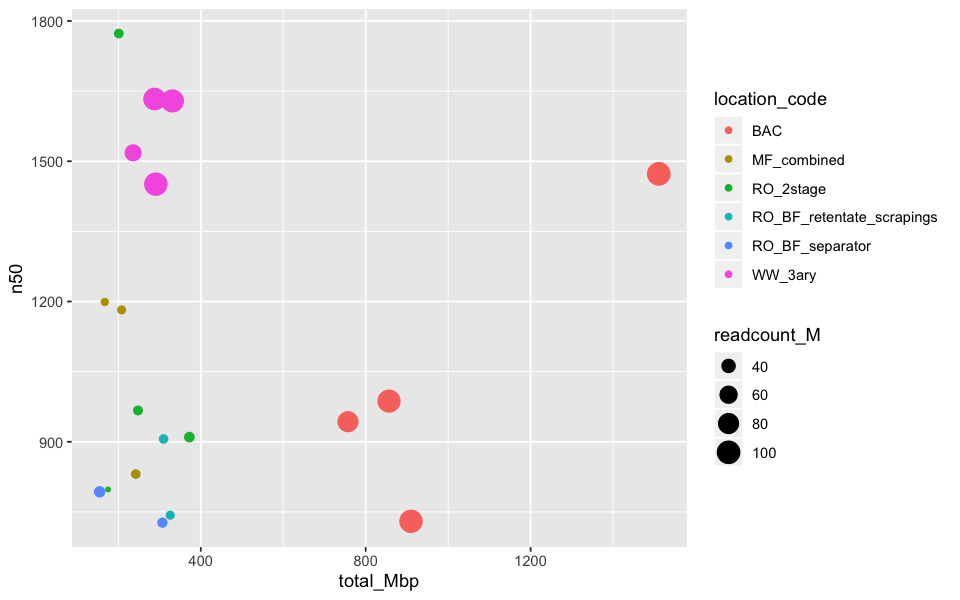

In [93]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(assem_stats, aes(x=total_Mbp, y=n50, size=readcount_M, color=location_code))+
    geom_point()#+
    #scale_y_continuous(trans="log10", limits=c(1e8, 1e10), labels=trans_format("log10", math_format(10^.x)))
#geom_histogram(aes(stat='identity'))